In [60]:
import tweepy
import csv
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

api_key = "9dO4xdinSEjyxtBfjzueGFKeW"
api_key_secret = "OrnvT252rsngPhq5lxdBwPh91sNBtsWzFNhW3S6pN8mHftRhu3"
access_token = "811343210777710592-uBEUOZWtTFAFf120csjmZSAKDUPySmZ"
access_token_secret = "dnUsgu5ALWnKz3EJzeaGMg2oatVBI74MEqtN4g8rQjhaO"

# api_key = config['twitter']['api_key']
# api_key_secret = config['twitter']['api_key_secret']
# access_token = config['twitter']['access_token']
# access_token_secret = config['twitter']['access_token_secret']

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
def category_tweet_retriever(query):
    tweets = []
    
    for tweet in tweepy.Cursor(api.search_tweets, 
                               q=query, 
                               lang='id', 
                               tweet_mode="extended").items(1000):
        tweets.append([tweet.created_at, tweet.author.screen_name, tweet.full_text])
        
    return tweets

In [4]:
df_id = pd.read_csv("stopwords_id.txt", header=None)
stopwords_id = df_id[0].to_list()

df_en = pd.read_csv("stopwords_en.txt", header=None)
stopwords_en = df_en[0].to_list()

def clean_tweet(tweet):    
    import stopwordsiso as stopwords

    process = tweet.lower()
    process = process.split()
    process = [word for word in process if not process in stopwords_en]
    process = [word for word in process if not process in stopwords_id]
    process = " ".join(word for word in process)
    process = re.sub("'", "", process) # to avoid removing contractions in english
    process = re.sub("^rt ", "", process)
    process = re.sub("@[A-Za-z0-9_]+","", process)
    process = re.sub("#","", process)
    process = re.sub(r'http\S+', '', process)
    process = re.sub('[()!?]', ' ', process)
    process = re.sub('\[.*?\]',' ', process)
    process = re.sub("[^a-z0-9]"," ", process)
    return process

In [8]:
def clean_spaces(tweet):
    process = tweet
    process = process.split()
    process = " ".join(word for word in process)
    return process

In [41]:
def splitter(tweet):
    return tweet.split()

In [66]:
def user_tweet_retriever(username):
    tweets = []
    
    for tweet in api.user_timeline(id=username,
                                   count=1000,
                                   tweet_mode="extended"):
        tweets.append([tweet.created_at, tweet.full_text])
        
    return tweets

# Data Retrieval

## Gunung

In [9]:
header = ["created_at", "author", "tweet"]
df_gunung = pd.DataFrame(category_tweet_retriever("gunung"), columns=header)

In [10]:
print(df_gunung.shape)
df_gunung.head()

(1000, 3)


,created_at,author,tweet
0,2022-11-04 08:00:27+00:00,Rutha91465781,Sahabat Ganjar bagikan ratusan paket di Gunung...
1,2022-11-04 08:00:09+00:00,mailabendia,Sahabat Ganjar bagikan ratusan paket sembako d...
2,2022-11-04 07:59:41+00:00,ikirikii,"Lagi-lagi si kaki berjalan sendiri, mengulang ..."
3,2022-11-04 07:59:16+00:00,Andpratama17,"RT @pagarhijaumnhn: [Terbaru]\n""Terlepas dari ..."
4,2022-11-04 07:59:06+00:00,Ladawn77621798,Sahabat Ganjar bagikan ratusan paket di Gunung...


In [13]:
df_gunung['tweet'] = df_gunung['tweet'].apply(lambda x: clean_tweet(x))
df_gunung['tweet'] = df_gunung['tweet'].apply(lambda x: clean_spaces(x))
df_gunung.head()

,created_at,author,tweet
0,2022-11-04 08:00:27+00:00,Rutha91465781,sahabat ganjar bagikan ratusan paket di gunung...
1,2022-11-04 08:00:09+00:00,mailabendia,sahabat ganjar bagikan ratusan paket sembako d...
2,2022-11-04 07:59:41+00:00,ikirikii,lagi lagi si kaki berjalan sendiri mengulang d...
3,2022-11-04 07:59:16+00:00,Andpratama17,terlepas dari banyaknya cibiran yang datang si...
4,2022-11-04 07:59:06+00:00,Ladawn77621798,sahabat ganjar bagikan ratusan paket di gunung...


## Pantai

In [15]:
header = ["created_at", "author", "tweet"]
df_pantai = pd.DataFrame(category_tweet_retriever("pantai"), columns=header)

In [17]:
print(df_pantai.shape)
df_pantai.head()

(1000, 3)


,created_at,author,tweet
0,2022-11-04 08:24:01+00:00,vaniakeisya_,‼ PROMO DISKON ‼\n\nPorto - Sandal Wanita Sand...
1,2022-11-04 08:23:44+00:00,Kemenparekraf,Menikmati jazz di tengah kota ✅\nMenikmati jaz...
2,2022-11-04 08:23:37+00:00,azrisaadon,RT @maisanism_: @CallSigMaverick @mynewshub @a...
3,2022-11-04 08:23:36+00:00,zhuonigning,@JanoIee kakaaak! mau ikut aku ke pantai gak?
4,2022-11-04 08:22:53+00:00,AnnyoungBlinkeu,RT @A_DeyJKT48: sunsetann pinggir pantai palin...


In [18]:
df_pantai['tweet'] = df_pantai['tweet'].apply(lambda x: clean_tweet(x))
df_pantai['tweet'] = df_pantai['tweet'].apply(lambda x: clean_spaces(x))
df_pantai.head()

,created_at,author,tweet
0,2022-11-04 08:24:01+00:00,vaniakeisya_,promo diskon porto sandal wanita sandal jepit ...
1,2022-11-04 08:23:44+00:00,Kemenparekraf,menikmati jazz di tengah kota menikmati jazz d...
2,2022-11-04 08:23:37+00:00,azrisaadon,panta
3,2022-11-04 08:23:36+00:00,zhuonigning,kakaaak mau ikut aku ke pantai gak
4,2022-11-04 08:22:53+00:00,AnnyoungBlinkeu,sunsetann pinggir pantai paling enk sambil mak...


In [20]:
print(df_pantai["tweet"][2])

panta


## Kuliner

In [21]:
header = ["created_at", "author", "tweet"]
df_kuliner = pd.DataFrame(category_tweet_retriever("kuliner"), columns=header)

In [22]:
print(df_kuliner.shape)
df_kuliner.head()

(1000, 3)


,created_at,author,tweet
0,2022-11-04 08:23:04+00:00,pretzeIove,@Jacksstanly @BenahiLuka @PAKRT147 @infotwitwo...
1,2022-11-04 08:21:42+00:00,gunsamudro_22,"RT @itstikakid: Lontong mie Pak Sidjan, lumaya..."
2,2022-11-04 08:20:54+00:00,bengkelpromosi,Bengkel Box Motor Delivery https://t.co/9TEUpb...
3,2022-11-04 08:20:32+00:00,VIVAlife_,"RT @VIVAcoid: 4 Resep Asinan Sayur, Kuliner Nu..."
4,2022-11-04 08:20:03+00:00,VIVAcoid,"4 Resep Asinan Sayur, Kuliner Nusantara Khas B..."


In [23]:
df_kuliner['tweet'] = df_kuliner['tweet'].apply(lambda x: clean_tweet(x))
df_kuliner['tweet'] = df_kuliner['tweet'].apply(lambda x: clean_spaces(x))
df_kuliner.head()

,created_at,author,tweet
0,2022-11-04 08:23:04+00:00,pretzeIove,wkwkwk bener padahal ya sebagai wna yang daten...
1,2022-11-04 08:21:42+00:00,gunsamudro_22,lontong mie pak sidjan lumayan enak buat yg su...
2,2022-11-04 08:20:54+00:00,bengkelpromosi,bengkel box motor delivery tangerang tangsel k...
3,2022-11-04 08:20:32+00:00,VIVAlife_,4 resep asinan sayur kuliner nusantara khas be...
4,2022-11-04 08:20:03+00:00,VIVAcoid,4 resep asinan sayur kuliner nusantara khas be...


# Dataset

In [ ]:
# drop duplikat dulu, baru digabungin ke dataset
# pr aliif

In [25]:
df_gunung["category"] = "gunung"
df_pantai["category"] = "pantai"
df_kuliner["category"] = "kuliner"

In [26]:
df_gunung.head()

,created_at,author,tweet,category
0,2022-11-04 08:00:27+00:00,Rutha91465781,sahabat ganjar bagikan ratusan paket di gunung...,gunung
1,2022-11-04 08:00:09+00:00,mailabendia,sahabat ganjar bagikan ratusan paket sembako d...,gunung
2,2022-11-04 07:59:41+00:00,ikirikii,lagi lagi si kaki berjalan sendiri mengulang d...,gunung
3,2022-11-04 07:59:16+00:00,Andpratama17,terlepas dari banyaknya cibiran yang datang si...,gunung
4,2022-11-04 07:59:06+00:00,Ladawn77621798,sahabat ganjar bagikan ratusan paket di gunung...,gunung


In [33]:
# sementara pakai ini dulu
# ke depannya gak pake csv
# ke depannya baca data dari database
unique = pd.read_csv("_dataset/dataset_unique 2022-11-01.csv")

In [ ]:
# baca data dari database
# masuk jadi bentuk dataframe
# kode database dari cc di sini

In [37]:
df_all = pd.concat([unique, df_gunung, df_pantai, df_kuliner], ignore_index=True)
print("unique dataset length before:", len(unique))
print("unique dataset length after new data addition:", len(df_all))

unique dataset length before: 27052
unique dataset length after new data addition: 30052


In [39]:
df_all.head()

,created_at,author,tweet,category
0,2022-10-15 16:30:08+00:00,RFebriono,knp org naik gunung simple mereka jenuh berleb...,gunung
1,2022-10-15 16:29:34+00:00,ivanasilo1,gua krn tinggal di bogor tiap pagi selalu liha...,gunung
2,2022-10-15 16:26:43+00:00,andrikunn,anjir enak banget ya sebulan sekali bisa naik ...,gunung
3,2022-10-15 16:25:41+00:00,iniahmed_,abi ge sok bingung om tarik teuing di gunung m...,gunung
4,2022-10-15 16:25:02+00:00,cabindimasanya,banda neira punya segudang cerita termasuk pen...,gunung


In [40]:
df_all = df_all.drop_duplicates(subset=['tweet'])
print("unique dataset length after duplicate removed:", len(df_all))

unique dataset length after duplicate removed: 28800


In [ ]:
# append tweet yang baru
# pr coco

# Naive Bayes Model

In [43]:
df_all = df_all.dropna()
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28799 entries, 0 to 30045
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  28799 non-null  object
 1   author      28799 non-null  object
 2   tweet       28799 non-null  object
 3   category    28799 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [56]:
df_all['category'].value_counts()

gunung     10452
pantai     10294
kuliner     8053
Name: category, dtype: int64

In [44]:
yTarget = df_all["category"]
print(yTarget)

0         gunung
1         gunung
2         gunung
3         gunung
4         gunung
          ...   
30026    kuliner
30027    kuliner
30033    kuliner
30039    kuliner
30045    kuliner
Name: category, Length: 28799, dtype: object


In [49]:
#test
Y = yTarget
print(Y)
print(Y.shape)

0         gunung
1         gunung
2         gunung
3         gunung
4         gunung
          ...   
30026    kuliner
30027    kuliner
30033    kuliner
30039    kuliner
30045    kuliner
Name: category, Length: 28799, dtype: object
(28799,)


In [51]:
vectorizer = CountVectorizer(analyzer=splitter).fit(df_all["tweet"])
xTarget = vectorizer.transform(df_all["tweet"])
# print(vectorizer.vocabulary_)
print(len(vectorizer.vocabulary_))
print(xTarget.shape)

46322
(28799, 46322)


In [52]:
tfidf = TfidfTransformer()
X = tfidf.fit_transform(xTarget)
print(X.shape)

(28799, 46322)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23039, 46322)
(5760, 46322)
(23039,)
(5760,)


In [54]:
NaiveBayes = MultinomialNB().fit(X_train, np.ravel(y_train, order="C"))
print(NaiveBayes)

MultinomialNB()


In [55]:
prediction = NaiveBayes.predict(X_test)
accuracies = accuracy_score(y_test, prediction)

print(prediction)
print(accuracies)

['gunung' 'pantai' 'pantai' ... 'gunung' 'gunung' 'gunung']
0.8989583333333333


In [61]:
cf_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix(y_test, prediction))

[[1888   18  206]
 [  77 1425   87]
 [ 159   35 1865]]


<AxesSubplot:>

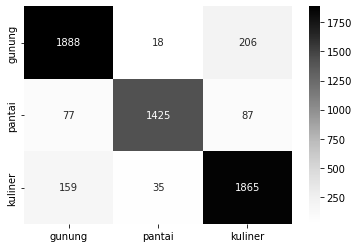

In [62]:
labels = ["gunung", "pantai", "kuliner"]
sns.heatmap(cf_matrix, annot=True, cmap='Greys', fmt="d",
            xticklabels=labels, yticklabels=labels)

# User Tweet Probability

In [63]:
X_dataset, y_dataset = X, Y

print(X_dataset.shape)
print(y_dataset.shape)

(28799, 46322)
(28799,)


In [80]:
username = "aliifnrhmn"

header = ["created_at", "tweet"]
df_user = pd.DataFrame(user_tweet_retriever(username), columns=header)
df_user['tweet'] = df_user['tweet'].apply(lambda x: clean_tweet(x))
df_user['tweet'] = df_user['tweet'].apply(lambda x: clean_spaces(x))
df_user.head()

Unexpected parameter: id


,created_at,tweet
0,2022-10-30 19:35:33+00:00,euy culture shock di bandung
1,2022-10-30 18:14:02+00:00,ketahanan terhadap rasa sakit akan terus berta...
2,2022-10-29 11:44:36+00:00,jakarta really changes lazy ass people
3,2022-10-27 10:51:04+00:00,telat baru sadar awkwk
4,2022-10-27 10:34:29+00:00,dont believe in yourself believe in the yourse...


In [81]:
for i in range(len(df_user)):
    if df_user['tweet'][i] == '':
        df_user = df_user.drop(i, axis=0)

In [82]:
print(len(df_user))
df_user.head()
print(userTarget[1])

192
  (0, 1582)	1
  (0, 1655)	1
  (0, 5507)	1
  (0, 5583)	1
  (0, 11202)	1
  (0, 18485)	1
  (0, 19574)	1
  (0, 20761)	1
  (0, 22614)	2
  (0, 25777)	1
  (0, 28036)	1
  (0, 35197)	2
  (0, 36537)	2
  (0, 36833)	1
  (0, 37557)	1
  (0, 42092)	1
  (0, 42387)	1
  (0, 42460)	1
  (0, 44028)	1


In [83]:
userTarget = vectorizer.transform(df_user["tweet"])
tfidf = TfidfTransformer()
user = tfidf.fit_transform(userTarget)
print(user.shape)
print(user[1])

(192, 46322)
  (0, 44028)	0.2010645234939637
  (0, 42460)	0.18642694036855345
  (0, 42387)	0.2010645234939637
  (0, 42092)	0.2010645234939637
  (0, 37557)	0.2010645234939637
  (0, 36833)	0.2010645234939637
  (0, 36537)	0.35208281972595873
  (0, 35197)	0.35208281972595873
  (0, 28036)	0.18642694036855345
  (0, 25777)	0.2010645234939637
  (0, 22614)	0.4021290469879274
  (0, 20761)	0.2010645234939637
  (0, 19574)	0.2010645234939637
  (0, 18485)	0.13638071310658476
  (0, 11202)	0.2010645234939637
  (0, 5583)	0.2010645234939637
  (0, 5507)	0.2010645234939637
  (0, 1655)	0.18642694036855345
  (0, 1582)	0.151018296231995


In [84]:
probability = NaiveBayes.predict_proba(user)
print(probability)

[[0.25922695 0.57108922 0.16968383]
 [0.25159439 0.17424235 0.57416325]
 [0.20734352 0.36676014 0.42589634]
 [0.43379378 0.23298658 0.33321964]
 [0.31716053 0.19866629 0.48417318]
 [0.10867878 0.04930285 0.84201837]
 [0.70430287 0.0800982  0.21559893]
 [0.506922   0.04966708 0.44341092]
 [0.23172434 0.12731322 0.64096244]
 [0.40630244 0.1436171  0.45008047]
 [0.52101419 0.19718271 0.28180309]
 [0.49247411 0.19036485 0.31716105]
 [0.49493315 0.14255725 0.36250961]
 [0.2334457  0.45012708 0.31642721]
 [0.45550045 0.24611432 0.29838523]
 [0.66304998 0.10640846 0.23054156]
 [0.39893375 0.1481097  0.45295656]
 [0.35821296 0.38627948 0.25550756]
 [0.24406725 0.50235751 0.25357524]
 [0.5048298  0.30160897 0.19356123]
 [0.35821296 0.38627948 0.25550756]
 [0.39673211 0.07993967 0.52332822]
 [0.3307877  0.26915114 0.40006116]
 [0.31481174 0.10519359 0.57999467]
 [0.50728119 0.25410076 0.23861806]
 [0.41060285 0.15276403 0.43663312]
 [0.18839934 0.66073844 0.15086222]
 [0.50006465 0.11714274 0.38

In [85]:
category0 = []
category1 = []
category2 = []
for i in range(len(probability)):
    category0.append(probability[i][0])
    category1.append(probability[i][1])
    category2.append(probability[i][2])

def average(list):
    return sum(list)/len(list)

print("username:", username)
print("Probability of gunung category : " + str(round(average(category0)*100, 2)) + "%")
print("Probability of pantai category : " + str(round(average(category1)*100, 2)) + "%")
print("Probability of kuliner category: " + str(round(average(category2)*100, 2)) + "%")

username: aliifnrhmn
Probability of gunung category : 37.96%
Probability of pantai category : 23.99%
Probability of kuliner category: 38.05%


In [ ]:
# fungsi if untuk kategori terbesar
# pr aliif